# Libraries

In [1]:
import sys
# path = r'C:\Users\wander\Documents\GitHub\PAREPYDEV_NEW'
# path = r'C:\Users\wande\OneDrive\Documentos\GitHub\PAREPY' # PC notebook wander
# path = r'C:\Users\UFG\Documents\github\PAREPY' # PC branco wander
path = r'C:\Users\rezio\OneDrive\Documentos\.git codes\PAREPY' # PC notebook luiz
sys.path.append(path)
import pandas as pd
pd.set_option('display.max_columns', None)

# Run

In [2]:
from parepy_toolbox import sampling_algorithm_structural_analysis
from obj_function import nowak_collins_example

# Dataset
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False}
p = {'type': 'gumbel max', 'parameters': {'mean': 10.2, 'sigma': 1.12}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 1000, 
             'numerical model': {'model sampling': 'lhs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': nowak_collins_example,
             'name simulation': None,
        }

# Call algorithm
results, pf, beta = sampling_algorithm_structural_analysis(setup)

13:35:27 - Checking inputs completed!
13:35:27 - Started State Limit Function evaluation (g)...
13:35:29 - Finished State Limit Function evaluation (g) in 1.65e+00 seconds!
13:35:29 - Started evaluation beta reliability index and failure probability...
13:35:29 - Finished evaluation beta reliability index and failure probability in 3.66e-03 seconds!
13:35:29 - Voilà!!!!....simulation results were not saved in a text file!


In [3]:
pf_list = pf.values.flatten().tolist()
beta_list = beta.values.flatten().tolist()
for i, (p, b) in enumerate(zip(pf_list, beta_list)):
    print(f"State Limite function (g): {i}, pf: {p:.6f}, beta: {b:.6f}")

State Limite function (g): 0, pf: 0.001000, beta: 3.090232


In [4]:
from parepy_toolbox import sampling_algorithm_structural_analysis_kernel
from obj_function import nowak_collins_example

# Dataset
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False}
p = {'type': 'gumbel max', 'parameters': {'mean': 10.2, 'sigma': 1.12}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 1000, 
             'numerical model': {'model sampling': 'mcs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': nowak_collins_example,
             'name simulation': 'sdsdsd',
        }

# Call algorithm
results = sampling_algorithm_structural_analysis_kernel(setup)

In [5]:
from tabulate import tabulate
table = tabulate(results, headers='keys', tablefmt='psql')
print(table)

+-----+---------+----------+----------+---------+---------+----------+-------+
|     |     X_0 |      X_1 |      X_2 |     R_0 |     S_0 |      G_0 |   I_0 |
|-----+---------+----------+----------+---------+---------+----------+-------|
|   0 | 31.4961 | 10.0277  | 0.235575 | 2519.69 | 1915.37 |  604.318 |     0 |
|   1 | 40.9042 | 10.3979  | 0.211127 | 3272.34 | 1792.78 | 1479.56  |     0 |
|   2 | 42.3576 |  8.46764 | 0.239581 | 3388.61 | 1854.49 | 1534.12  |     0 |
|   3 | 35.9536 |  9.34065 | 0.237567 | 2876.29 | 1889.89 |  986.402 |     0 |
|   4 | 41.4182 | 10.5185  | 0.255    | 3313.45 | 2055.16 | 1258.29  |     0 |
|   5 | 38.0618 |  8.72365 | 0.28016  | 3044.95 | 2104.97 |  939.976 |     0 |
|   6 | 47.4352 |  8.97575 | 0.264715 | 3794.82 | 2028.51 | 1766.31  |     0 |
|   7 | 41.2558 |  9.45694 | 0.284494 | 3300.47 | 2169.84 | 1130.62  |     0 |
|   8 | 27.3482 | 12.3613  | 0.287459 | 2187.86 | 2343.97 | -156.111 |     1 |
|   9 | 37.1045 | 10.0996  | 0.238021 | 2968.36 | 19

In [6]:
from parepy_toolbox import sampling_algorithm_structural_analysis
from obj_function import nowak_collins_time_example
import numpy as np

# Dataset
f = {'type': 'normal', 
    'parameters': {'mean': 40.3, 'sigma': 4.64}, 
    'stochastic variable': False, 
    }

p = {'type': 'gumbel max',
    'parameters': {'mean': 10.2, 'sigma': 1.12}, 
    'stochastic variable': False, 
    }

w = {'type': 'lognormal',
    'parameters': {'mean': 0.25, 'sigma': 0.025}, 
    'stochastic variable': False, 
    }

# PAREpy setup
setup = {
             'number of samples': 70000, 
             'numerical model': {'model sampling': 'mcs-time', 'time steps': 5}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': {'time analysis': list(np.linspace(0, 50, num=5, endpoint=True))},
             'objective function': nowak_collins_time_example,
             'name simulation': None,
        }

# Call algorithm
results, pf, beta = sampling_algorithm_structural_analysis(setup)

13:35:29 - Checking inputs completed!
13:35:29 - Started State Limit Function evaluation (g)...
13:35:33 - Finished State Limit Function evaluation (g) in 4.06e+00 seconds!
13:35:33 - Started evaluation beta reliability index and failure probability...
13:35:33 - Finished evaluation beta reliability index and failure probability in 1.63e-02 seconds!
13:35:33 - Voilà!!!!....simulation results were not saved in a text file!


In [7]:
pf_list = pf['G_0'].tolist()
beta_list = beta['G_0'].tolist()
for i, (p, b) in enumerate(zip(pf_list, beta_list)):
    print(f"Time step (id={i}, time={setup['none variable']['time analysis'][i]}), pf: {p:.6f}, beta: {b:.6f}")

Time step (id=0, time=0.0), pf: 0.001600, beta: 2.947843
Time step (id=1, time=12.5), pf: 0.001600, beta: 2.947843
Time step (id=2, time=25.0), pf: 0.001600, beta: 2.947843
Time step (id=3, time=37.5), pf: 0.001600, beta: 2.947843
Time step (id=4, time=50.0), pf: 0.001600, beta: 2.947843


C:\Users\rezio\AppData\Local\Temp\ipykernel_5408\2470366457.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


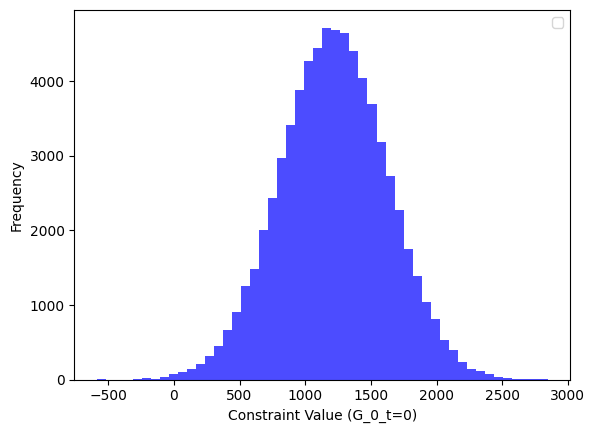

Most Probable Points Near Failure (G_0_t=0 >= 0):
         X_0_t=0    X_0_t=1    X_0_t=2    X_0_t=3    X_0_t=4    X_1_t=0  \
52765  26.190680  26.190680  26.190680  26.190680  26.190680   8.611884   
55746  29.325160  29.325160  29.325160  29.325160  29.325160  14.069698   
66701  27.526981  27.526981  27.526981  27.526981  27.526981  10.740514   

         X_1_t=1    X_1_t=2    X_1_t=3    X_1_t=4   X_2_t=0   X_2_t=1  \
52765   8.611884   8.611884   8.611884   8.611884  0.279306  0.279306   
55746  14.069698  14.069698  14.069698  14.069698  0.271309  0.271309   
66701  10.740514  10.740514  10.740514  10.740514  0.277433  0.277433   

        X_2_t=2   X_2_t=3   X_2_t=4  STEP_t_0  STEP_t_1  STEP_t_2  STEP_t_3  \
52765  0.279306  0.279306  0.279306       0.0       1.0       2.0       3.0   
55746  0.271309  0.271309  0.271309       0.0       1.0       2.0       3.0   
66701  0.277433  0.277433  0.277433       0.0       1.0       2.0       3.0   

       STEP_t_4      R_0_t=0      R_0_t

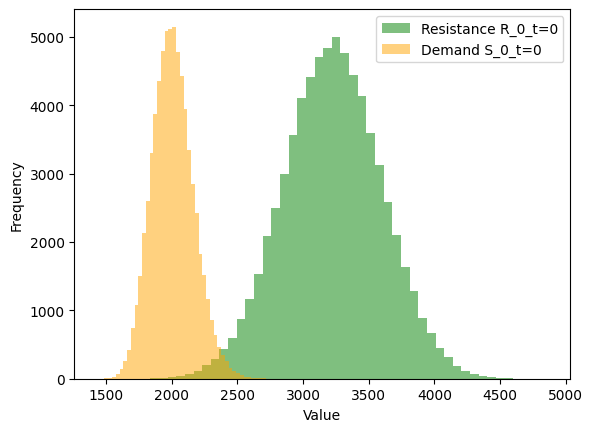

G_0 - p_f: 0.001600, β: 2.947843


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Plot histogram of G_0_t=0
plt.hist(results['G_0_t=0'], bins=50, alpha=0.7, color='blue')
plt.xlabel("Constraint Value (G_0_t=0)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 2. Find the three most probable points near zero for G_0_t=0
## 2.1 Sort the results by G_0_t=0 >=0
sorted_positive = results[results['G_0_t=0'] >= 0].sort_values(by='G_0_t=0', ascending=True)
print('Most Probable Points Near Failure (G_0_t=0 >= 0):')
print(sorted_positive.head(3))

## 2.2 Sort the results by G_0_t=0 <=0
sorted_negative = results[results['G_0_t=0'] <= 0].sort_values(by='G_0_t=0', ascending=False)
print('Most Probable Points Near Failure (G_0_t=0 <= 0):')
print(sorted_negative.head(3))


# 3. Overlay histograms for R_0_t=0 and S_0_t=0
plt.hist(results['R_0_t=0'], bins=50, alpha=0.5, color='green', label='Resistance R_0_t=0')
plt.hist(results['S_0_t=0'], bins=50, alpha=0.5, color='orange', label='Demand S_0_t=0')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 4. Convert pf and beta to lists
pf_list = pf.iloc[:, :].values.flatten().tolist()
beta_list = beta.iloc[:, :].values.flatten().tolist()

# 5. Iterate through reliability results for constraints
for pf_column, beta_column, (pf_value, beta_value) in zip(pf.columns, beta.columns, zip(pf_list, beta_list)):
    print(f"{pf_column} - p_f: {pf_value:.6f}, β: {beta_value:.6f}")
